In [ ]:
# DSC630 Week 4 ALS Review

In [ ]:
# Josh Gilkinson

In [2]:
import pandas as pd

Als_path = r'C:\Users\jgilk\OneDrive\Desktop\Data Science\DSC630\als_data.csv'
df = pd.read_csv(Als_path)

In [20]:
# Drop noncritical columns
columns_to_drop = ['ID', 'SubjectID']
als_data_relevant = df.drop(columns=columns_to_drop)

# ID and SubjectID were omitted as they do not provide any useful information
# for the study of ALS. 

In [21]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(als_data_relevant)



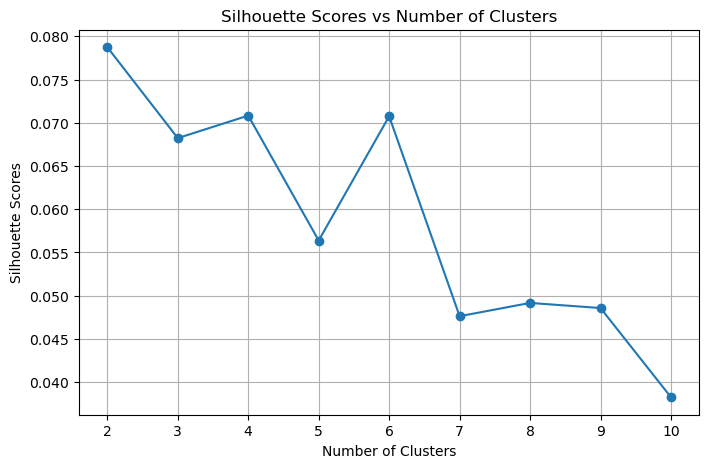

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range
cluster_range = range(2, 11)
silhouette_scores = []

# Scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.grid()
plt.show()



In [23]:
# Using 2 clusters since that was the peak of the silhouette score
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(scaled_data)

cluster_labels = kmeans.labels_


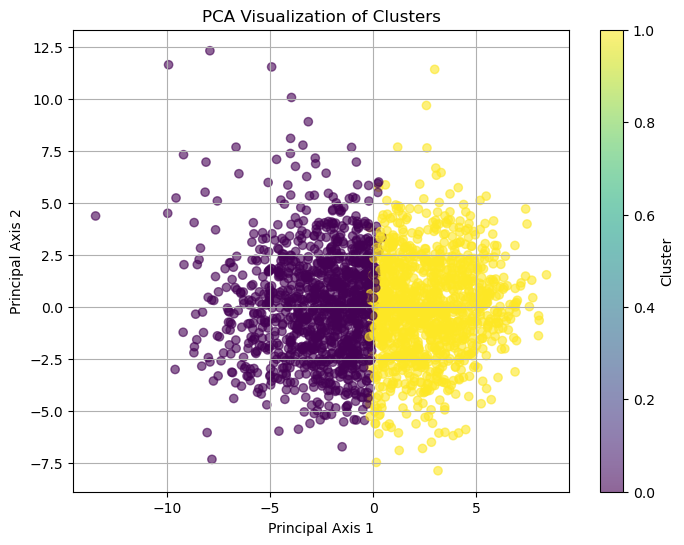

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Scatter
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', 
            alpha=0.6)
plt.title("PCA Visualization of Clusters")
plt.xlabel("Principal Axis 1")
plt.ylabel("Principal Axis 2")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()


In [ ]:
#Summary

In [25]:
#Cluster 0 shows higher albumin levels, higher ALSFRS scores, and stronger
# trunk strenghth, all of which are indicative of better functionality, 
# nutrition, strength, and overall slower disease progression. 

In [ ]:
# Cluster 1 shows the inverse. Lower ALSFRS scores, a faster ALSFRS decline 
# and lower trunk strength, which indicates a more aggresssive form of 
# the disease. 